In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.externals import joblib
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/KmeansClustering_customer_segmentation/data.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [58]:
X = df.iloc[:,[3,4]].values

Calculating WCSS = Within-Cluster-Sum-of-Squares 

In [60]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init = 'k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

Plotting Elbow graph

Text(0, 0.5, 'WCSS')

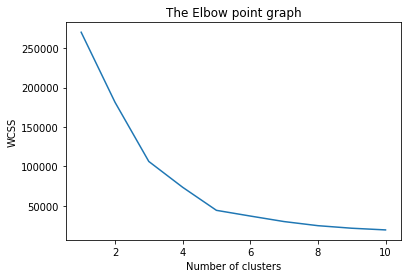

In [61]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow point graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Number of cluster to be made is 5

In [62]:
kmeans = KMeans(n_clusters=5,init = 'k-means++')
Y = kmeans.fit_predict(X)
df2 = pd.DataFrame(Y)

Givving the numerical attribute to each cluster

In [63]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


Plotting all clusters

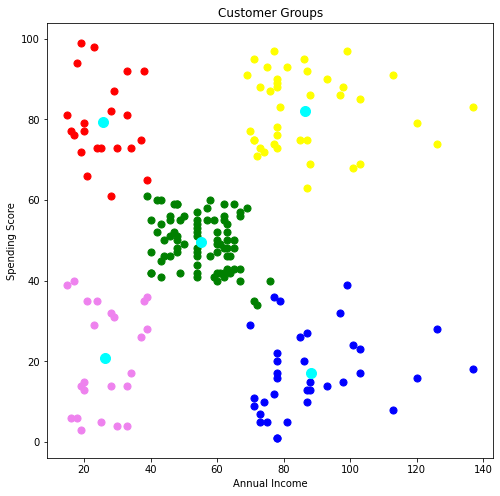

In [64]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Concating the cluster values with original dataframe

In [99]:
df1 = pd.DataFrame(Y)
df2 = pd.concat([df, df1.reindex(df.index)], axis=1)

In [86]:
df2.isna().sum()

CustomerID    0
Gender        0
Age           0
income        0
score         0
0             0
dtype: int64

In [100]:
df2 = df2.rename(columns={0: 'cluster_number'})

Converting categorical data to numerical data

In [116]:
df2 = df2.replace({'Male': 0, 'Female': 1})

In [117]:
df2.head()

,CustomerID,Gender,Age,income,score,cluster_number
0,1,0,19,15,39,3
1,2,0,21,15,81,1
2,3,1,20,16,6,3
3,4,1,23,16,77,1
4,5,1,31,17,40,3


Getting X and Y attributes for training the model

In [118]:
x = df2.drop(columns = ['CustomerID','cluster_number'])
y = df2['cluster_number']

Splitting attributes into training and testing dataset

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [120]:
len(x_test)

60

Function to check best model for training the dataset

In [121]:
def check(model):
  score = 0
  for model in model:
    model.fit(x_train,y_train)
    model_name = type(model).__name__
    temp_score = model.score(x_test,y_test)
    if temp_score>score:
      score = temp_score
      model_name_best = model_name
      model_final = model
    print(model_name,temp_score)
    print('\n')
  print('The best model is : ',model_name_best,score)
  print('\n')
  return model_final

Input model Array and Getting result

In [122]:
model = [LinearRegression(),LogisticRegression(), SVC(), DecisionTreeClassifier(), Lasso(),Ridge()]
model = check(model)

LinearRegression 0.3011428524345673


LogisticRegression 0.85


SVC 0.9666666666666667


DecisionTreeClassifier 0.9833333333333333


Lasso 0.3116403309186083


Ridge 0.301064806312202


The best model is :  DecisionTreeClassifier 0.9833333333333333




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Tesing the predicted value of model with Actual value

In [124]:
df.result = df2.cluster_number
arr = [1,23,16,77]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [127]:
input = np.array(arr)
predicted = model.predict([input])[0]
Actual = df.result.iloc[3]
print('The Predicted value is: ', predicted)
print('The Actual value is: ', Actual)

The Predicted value is:  1
The Actual value is:  1


In [128]:
cd /content/drive/MyDrive/KmeansClustering_customer_segmentation

/content/drive/MyDrive/KmeansClustering_customer_segmentation


In [129]:
joblib.dump(model, 'model.pkl')

['model.pkl']